# gdrive mount

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_nodej_interactivity = "all"

# data load

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

import warnings
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os


In [0]:
path = 'drive/My Drive/bigcontest2019/data/'
print(os.listdir(path + 'train'),'\n', 
      os.listdir(path + 'test'),'\n', 
      os.listdir(path + '../metrics'),'\n', 
      os.listdir(path + '../scripts'))

['train_label.csv', 'train_activity.csv', 'train_combat.csv', 'train_payment.csv', 'train_pledge.csv', 'train_trade.csv'] 
 ['test1_payment.csv', 'test2_payment.csv', 'test1_activity.csv', 'test1_combat.csv', 'test1_pledge.csv', 'test1_trade.csv', 'test2_activity.csv', 'test2_combat.csv', 'test2_pledge.csv', 'test2_trade.csv'] 
 ['score_function.py', '자체성능평가함수안내.pdf', 'score_function.r', '__pycache__', 'lhh_inference', 'bjw_inference', 'hh_inference', 'nes_inference', 'metrics_test_lhh.ipynb'] 
 ['explortary data', 'model', 'data merge']


In [0]:
print('Load train datasets')
train_label = pd.read_csv(path + 'train/train_label.csv')

train_activity = pd.read_csv(path + 'train/train_activity.csv')
train_payment = pd.read_csv(path + 'train/train_payment.csv')
train_trade = pd.read_csv(path + 'train/train_trade.csv')
train_pledge = pd.read_csv(path + 'train/train_pledge.csv')
train_combat = pd.read_csv(path + 'train/train_combat.csv')

print('Load test1 datasets')
test1_activity = pd.read_csv(path + 'test/test1_activity.csv')
test1_payment = pd.read_csv(path + 'test/test1_payment.csv')
test1_trade = pd.read_csv(path + 'test/test1_trade.csv')
test1_pledge = pd.read_csv(path + 'test/test1_pledge.csv')
test1_combat = pd.read_csv(path + 'test/test1_combat.csv')

print('Load test2 datasets')
test2_activity = pd.read_csv(path + 'test/test2_activity.csv')
test2_payment = pd.read_csv(path + 'test/test2_payment.csv')
test2_trade = pd.read_csv(path + 'test/test2_trade.csv')
test2_pledge = pd.read_csv(path + 'test/test2_pledge.csv')
test2_combat = pd.read_csv(path + 'test/test2_combat.csv')

print('done!')

Load train datasets
Load test1 datasets
Load test2 datasets
done!


# Merge train and test

In [0]:
#NA값 확인
print(activity.isnull().sum().sum(),payment.isnull().sum().sum(),pledge.isnull().sum().sum(),combat.isnull().sum().sum())

0 0 0 0


In [0]:
train_label['survival_time']<8

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14        True
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27        True
28       False
29       False
         ...  
39970    False
39971     True
39972    False
39973    False
39974    False
39975    False
39976    False
39977     True
39978    False
39979    False
39980    False
39981    False
39982    False
39983    False
39984    False
39985     True
39986    False
39987    False
39988    False
39989    False
39990    False
39991    False
39992    False
39993    False
39994    False
39995    False
39996    False
39997    False
39998    False
39999    False
Name: survival_time, Length: 40000, dtype: bool

In [0]:
print(trade.isnull().sum()/len(trade)) # trade price(거래 가격 - 교환창 거래 (Type=1)일 경우 NA)

day               0.000000
time              0.000000
type              0.000000
server            0.000000
source_acc_id     0.000000
source_char_id    0.000000
target_acc_id     0.000000
target_char_id    0.000000
item_type         0.000000
item_amount       0.000000
item_price        0.599114
dtype: float64


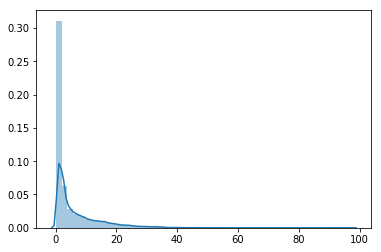

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train_label['amount_spent']*train_label['survival_time'])

In [0]:
activity = pd.concat([train_activity,test1_activity,test2_activity])
payment = pd.concat([train_payment,test1_payment,test2_payment])
trade = pd.concat([train_trade,test1_trade,test2_trade])
pledge = pd.concat([train_pledge,test1_pledge,test2_pledge])
combat = pd.concat([train_combat,test1_combat,test2_combat])

In [0]:
sns.set()  

# Simple EDA

In [0]:
pd.options.display.float_format = "{:.2f}".format # 수치를 float 형태로 변환 
activity.describe()

,day,acc_id,char_id,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
count,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00,3073650.00
mean,14.97,65341.52,198305.78,1.11,0.45,0.17,0.12,0.09,0.10,0.09,0.08,0.06,0.19,0.23,0.00,0.02
std,8.13,37636.63,114698.86,1.24,1.00,1.00,1.00,1.00,0.30,1.00,1.00,1.00,0.58,0.77,1.00,1.00
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-89.52,0.00
25%,8.00,32658.00,98904.25,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00
50%,15.00,65468.00,197945.00,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,22.00,97908.00,297764.00,2.01,0.36,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,28.00,130474.00,397445.00,3.37,17.87,69.33,111.84,36.03,1.00,301.94,303.73,111.64,3.37,3.37,91.18,314.74


In [0]:
combine = train_activity[['acc_id','char_id','day','playtime','rich_monster','npc_kill']].merge(
    train_combat[['char_id','day','level','class']], on=["char_id", 'day'], how="outer").merge(
    train_label, on=["acc_id"], how="outer")

In [0]:
test1_combine = test1_activity[['acc_id','char_id','day','playtime','rich_monster','npc_kill']].merge(
    test1_combat[['char_id','day','level','class']], on=["char_id", 'day'], how="outer")

In [0]:
test2_combine = test2_activity[['acc_id','char_id','day','playtime','rich_monster','npc_kill']].merge(
    test2_combat[['char_id','day','level','class']], on=["char_id", 'day'], how="outer")

In [0]:
test1_combine.columns

Index(['acc_id', 'char_id', 'day', 'playtime', 'rich_monster', 'npc_kill',
       'level', 'class'],
      dtype='object')

# merge

## activity

In [0]:
train_activity['game_money_change'] = np.abs(train_activity['game_money_change'])
train_activity_group = train_activity.groupby('acc_id').agg(
    {
        'day':'nunique',           # 날짜
        'char_id':'nunique',       # 캐릭터 아이디
        'server':'nunique',        # 캐릭터 서버
        'playtime':'sum',          # 일일 플레이시간
        'npc_kill':'sum',          # NPC를 죽인 횟수
        'solo_exp':'sum',          # 솔로 사냥 획득 경험치
        'party_exp':'sum',         # 파티 사냥 획득 경험치
        'quest_exp':'sum',         # 퀘스트 획득 경험치
        'rich_monster':'sum',      # ??보스 몬스터 타격 여부 (0=미타격 ,1= 타격)
        'death':'sum',             # 캐릭터 사망 횟수
        'revive':'sum',            # 부활 횟수
        'exp_recovery':'sum',      # 경험치 복구 횟수(성당)
        'fishing':'sum',           # 일일 낚시 시간
        'private_shop':'sum',      # 일일 개인상점 운영 시간
        'game_money_change':'sum', # 일일 아데나 변동량
        'enchant_count':'sum',     # 7레벨 이상 아이템 인첸트 시도 횟수
    })

In [0]:
train_activity_group.head()

,day,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
acc_id,,,,,,,,,,,,,,,,
2,28,1,1,91.53,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,84.90,4.06,0.00
5,10,3,1,6.12,3.24,2.16,0.70,0.11,9,0.25,0.25,0.00,3.44,0.00,0.33,0.00
8,28,7,1,18.80,31.17,31.49,0.00,1.56,2,91.96,92.50,0.00,4.81,0.00,9.24,0.00
17,28,4,1,28.46,30.46,9.26,8.82,2.32,21,1.72,1.73,0.00,13.99,0.00,6.13,0.00
20,27,2,4,25.59,34.10,0.27,0.08,0.08,8,0.98,0.99,0.00,4.30,2.92,8.54,0.00


## payment

In [0]:
train_payment_group = train_payment.groupby('acc_id').agg(
    {
        'day':'nunique',              # 날짜
        'amount_spent': 'sum'         # 일별 결제 금액
    })

In [0]:
#train_payment_group.head()
train_payment_group.describe()

,day,amount_spent
count,23726.00,23726.00
mean,2.80,1.87
std,2.20,2.10
min,1.00,0.01
25%,1.00,0.37
50%,2.00,1.06
75%,4.00,2.46
max,20.00,12.56


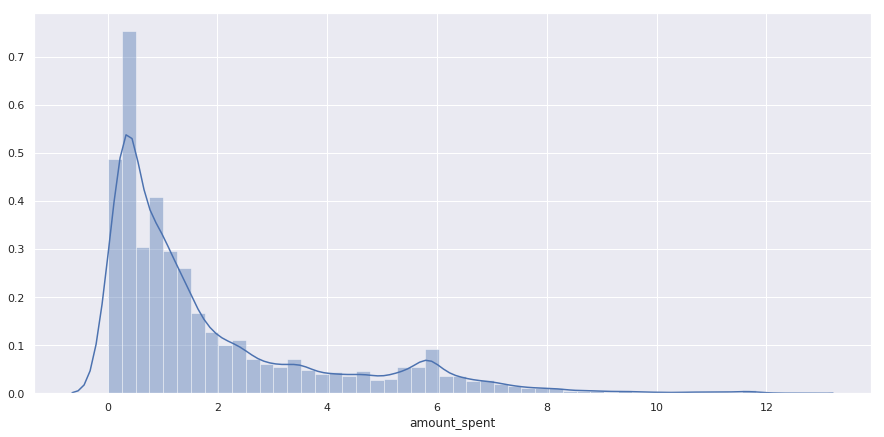

In [0]:
plt.figure(figsize=(15, 7))
sns.distplot(train_payment_group['amount_spent']) # 보통 1번 결제 함, 월 정액을 말 하는 듯
# sns.kdeplot(train_payment_group['day'])

## pledge

In [0]:
train_pledge_group = train_pledge.groupby('acc_id').agg(
    {
        'day': 'nunique',                   # 날짜
        'char_id': 'nunique',               # 캐릭터 아이디
        'server' : 'nunique',               # 캐릭터 서버
        'pledge_id' : 'nunique',            # 혈맹 아이디
        'play_char_cnt' : 'sum',        # 게임에 접속한 혈맹원 수
        'combat_char_cnt' : 'sum',      # 전투에 참여한 혈맹원 수
        'pledge_combat_cnt': 'sum',     # 혈맹 간 전투 횟수의 합
        'random_attacker_cnt' : 'sum',  # 혈맹원 중 막피 전투를 행한 횟수의 합
        'random_defender_cnt': 'sum',   # 혈맹원 중 막피로부터 피해를 받은 횟수의 합
        'same_pledge_cnt': 'sum',       # 동일 혈맹원 간 전투 횟수의 합
        'temp_cnt' : 'sum',             # 혈맹원들의 단발성 전투 횟수의 합
        'etc_cnt' : 'sum',              # 혈맹원들의 기타 전투 횟수의 합
        'combat_play_time': 'sum',      # 혈맹의 전투 캐릭터들의 플레이 시간의 합
        'non_combat_play_time' : 'sum' # 혈맹의 非전투 캐릭터 플레이 시간의 합
    })

In [0]:
train_pledge_group.head()
#train_pledge_group.describe()

,day,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
acc_id,,,,,,,,,,,,,,
5,10,3,1,3,5.56,1.59,0.00,1.94,0.93,0.00,2.57,0.81,5.10,0.00
8,28,7,1,4,201.31,58.03,2.72,33.63,21.75,29.44,92.46,61.35,136.88,0.03
17,28,2,1,1,71.31,21.69,0.49,9.23,10.87,1.59,36.78,12.51,65.69,0.00
20,27,1,4,2,54.89,25.52,7.96,11.97,6.58,11.14,28.38,44.41,66.45,0.00
21,26,1,2,1,1.66,0.36,0.00,0.00,0.07,0.00,0.79,0.04,0.50,0.88


## combat

In [0]:
train_combat_group = train_combat.groupby('acc_id').agg(
    {
        'day': 'nunique',              # 날짜
        'char_id': 'nunique',          # 캐릭터 아이디
        'server' : 'nunique',          # 캐릭터 서버
        'class' : 'nunique',               # 직업
        'pledge_cnt' : 'sum',          # 혈맹간 전투에 참여한 횟수
        'random_attacker_cnt' : 'sum', # 본인이 막피 공격을 행한 횟수
        'random_defender_cnt' : 'sum', # 막피 공격자로부터 공격을 받은 횟수
        'temp_cnt' : 'sum',            # 단발성 전투 횟수
        'same_pledge_cnt' : 'sum',     # 동일 혈맹원 간의 전투 횟수
        'etc_cnt' : 'sum',             # 기타 전투 횟수
        'num_opponent' : 'sum'        # 전투 상대 캐릭터수
    })

In [0]:
train_combat_group.head()
#train_combat_group.describe()

,day,char_id,server,class,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
acc_id,,,,,,,,,,,
2,28,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,10,3,1,1,0.00,0.00,0.00,0.48,0.00,0.00,0.10
8,28,7,1,7,0.13,4.27,1.18,3.84,0.00,0.90,3.04
17,28,4,1,2,0.00,0.00,2.37,3.36,12.40,0.68,1.37
20,27,2,4,2,1.28,0.00,1.18,0.48,0.00,16.44,10.11


- 캐릭터와 클래스에 비해 서버가 굉장히 많은 경우가 있다. 
- 이 경우엔 서버 이전, 이후 데이터가 모두 기록된 것 같다. 즉 서버 이전이 train data 기간에 있었다는 것.
- 경우 1 : 서버 이동 이벤트
- 경우 2 : 서버 통합

## trade

## scatter matrix

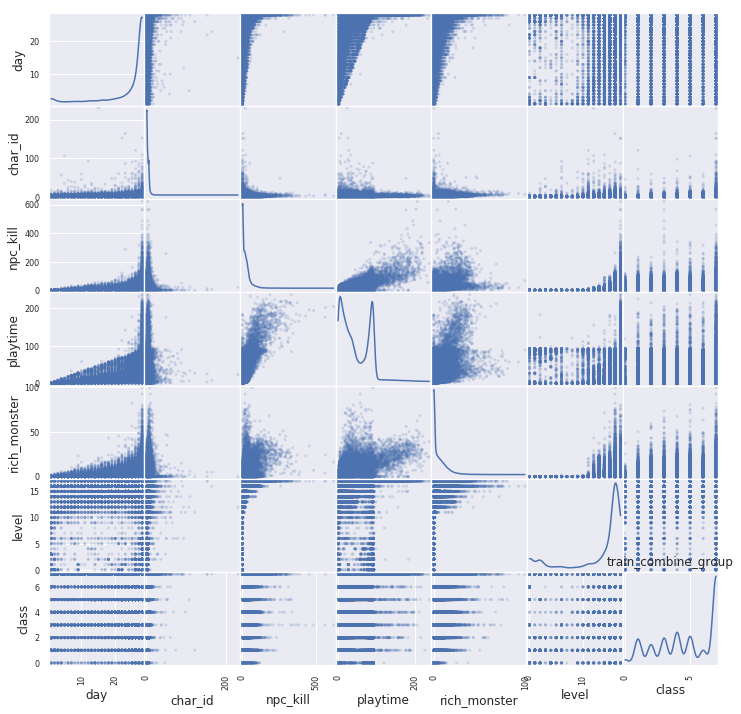

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_combine_group.drop(['amount_spent','survival_time'], axis = 1), alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.title('train_combine_group')
plt.show()

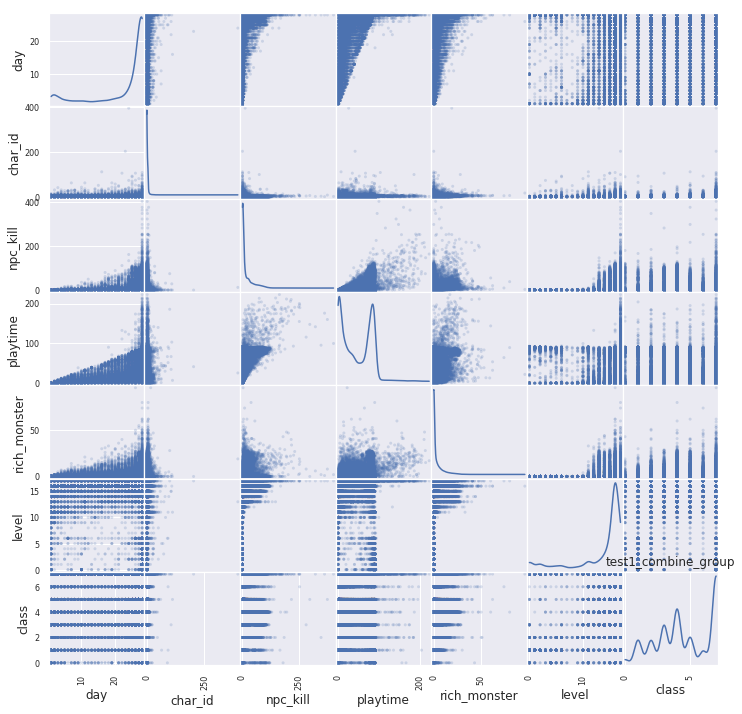

In [0]:
scatter_matrix(test1_combine_group, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.title('test1_combine_group')
plt.show()

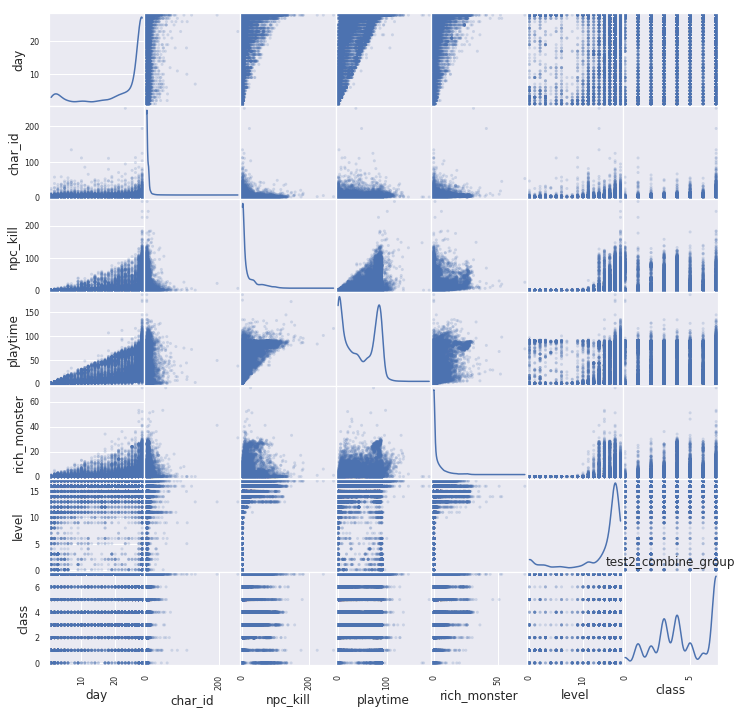

In [0]:
scatter_matrix(test2_combine_group, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.title('test2_combine_group')
plt.show()

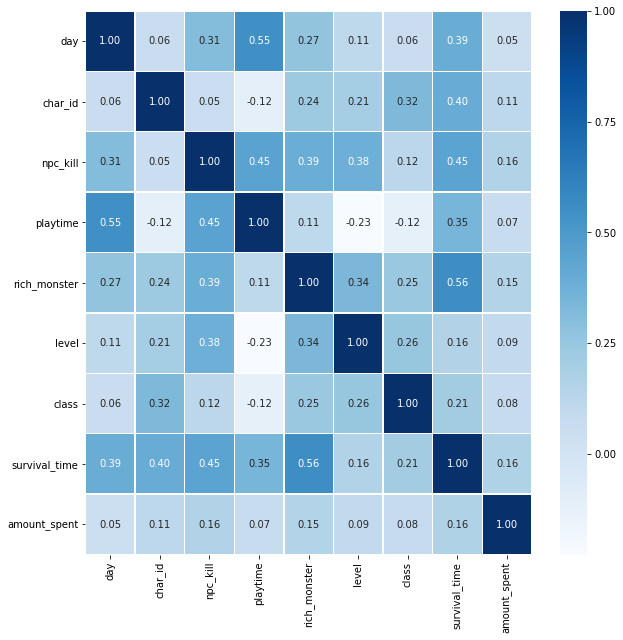

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(data = train_combine_group.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

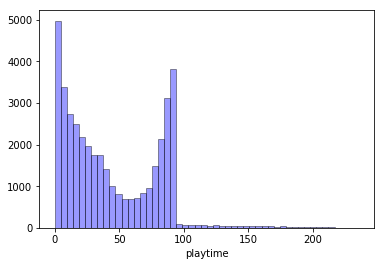

In [0]:
sns.distplot(train_combine_group['amount_spent'], hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [0]:
combine_group.sort_values(by=['npc_kill'], inplace=True, ascending=False)
combine_group.head(20)

,day,char_id,npc_kill,playtime,rich_monster,level,class
acc_id,,,,,,,
128887,28,4,622.271757,204.561563,16,17.0,3.0
41767,28,7,567.454830,201.621700,24,17.0,7.0
21813,28,4,564.061574,175.579570,4,17.0,3.0
128097,28,4,486.422538,193.642406,7,17.0,3.0
30574,28,6,456.937940,195.538337,34,17.0,7.0
71360,28,3,432.206807,178.552202,23,17.0,3.0
73151,28,3,401.869586,99.833626,2,17.0,7.0
65627,28,4,392.244038,180.773484,5,17.0,7.0
105087,28,4,385.862039,164.569128,2,17.0,3.0


Text(0, 0.5, 'npc_kill')

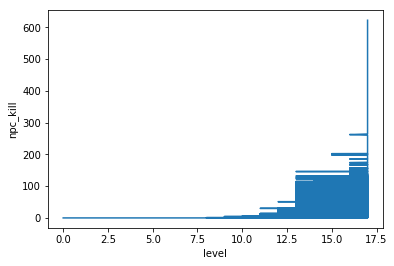

In [0]:
plt.plot(combine_group['level'], combine_group['npc_kill'])
plt.xlabel('level')
plt.ylabel('npc_kill')

In [0]:
combine_group['npc_kill'].max()

622.2717567206226

In [0]:
payment.describe()

In [0]:
payment.info()

In [0]:
trade.describe()

In [0]:
trade.info()

In [0]:
pledge.describe()

In [0]:
pledge.info()

# Grouping

## activity

## payment

In [0]:
train_payment_group = train_payment.groupby('acc_id').agg({'day':'nunique',
                                                           'amount_spent':'sum'})

## trade

- 1주일 40회 이상 수수료 부과(2만, 2만 1천)

In [0]:
train_trade.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
0,7,21:13:05,1,ag,11439,385109,48152,34247,enchant_scroll,4.793968e-08,NaN
1,2,15:33:00,1,al,22220,259705,43228,379826,enchant_scroll,4.314571e-06,NaN
2,1,14:24:53,1,al,18212,164230,38145,34209,accessory,7.190952e-08,NaN
3,7,23:13:43,1,au,121622,49839,71226,281334,adena,9.587936e-03,NaN
4,2,12:43:33,0,bd,14421,344503,65220,210558,etc,1.198492e-07,0.000639


In [0]:
train_trade.groupby('target_acc_id')['type'].value_counts().unstack().dropna()

type,0,1
target_acc_id,,
8,2.0,8.0
17,39.0,18.0
19,2.0,21.0
20,36.0,9.0
21,20.0,6.0
22,18.0,11.0
26,5.0,23.0
31,3.0,2.0
33,12.0,1.0


## pledge


In [0]:
train_pledge.head()

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
0,1,106660,345122,aa,381,0.036089,0.036089,0.0,0.0,0.0,0.0,0.000000,0.007078,0.027568,0.000000
1,1,46383,161773,aa,10892,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006139
2,1,18495,321373,aa,13705,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000347
3,1,118293,366707,aa,2982,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001042
4,1,50421,158063,aa,27104,0.216536,0.072179,0.0,0.0,0.0,0.0,0.098883,0.056626,0.083978,0.000000


## combat

In [0]:
train_combat.head()

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,54861,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1,13809,256332,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1,13809,307293,ap,3,14,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1,13809,374964,ap,7,16,0.0,0.0,0.0,0.0,0.0,0.112612,0.098129
4,1,13809,117917,ap,2,11,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


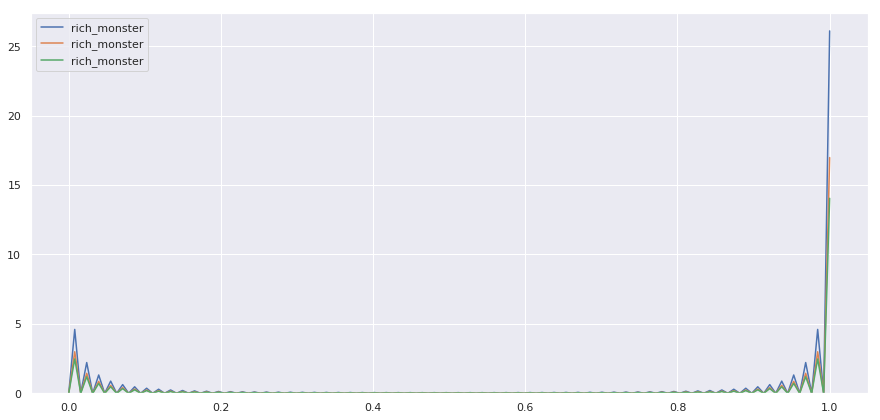

In [0]:
plt.figure(figsize=(15, 7))
sns.kdeplot(train_activity['rich_monster'])
sns.kdeplot(test1_activity['rich_monster'])
sns.kdeplot(test2_activity['rich_monster'])
plt.show()